In [1]:
%cd '/home/oscarp/cursos/CursoFundamentosPracticosML/code/datasets'
!ls

/home/oscarp/cursos/CursoFundamentosPracticosML/code/datasets
canciones-2018.csv  diabetes.csv  salarios.csv


In [2]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
diabetes.shape

(768, 9)

In [5]:
feature_cols = ['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure', 'DiabetesPedigreeFunction']
x = diabetes[feature_cols]
y = diabetes.Outcome

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [7]:
X_train.head(3)

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
762,9,0,22.5,33,89,62,0.142
127,1,94,33.3,23,118,58,0.261
564,0,0,32.4,27,91,80,0.601


In [8]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)

/home/oscar-dev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [10]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]])

Text(0.5, 257.44, 'Etiqueta de predicción')

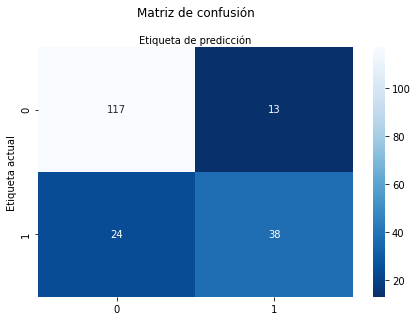

In [11]:
import numpy as np

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusión', y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de predicción')

In [14]:
print(f'Exactitud {metrics.accuracy_score(Y_test, y_pred)}')

Exactitud 0.8072916666666666
